In [1]:
%matplotlib inline
import os
import pandas as pd
import sklearn  as sk
import matplotlib.pyplot as plt
import numpy as np 
import urllib.request
import json

In [ ]:
#https://www.eia.gov/state/data.php?sid=CA#SupplyDistribution

In [2]:
#https://www.eia.gov/opendata/commands.php
if 'EIA_TOKEN' in os.environ:
    API_KEY = os.environ['EIA_TOKEN']
    series_id = 'ELEC.GEN.ALL-CA-99.M';'SEDS.TERCB.CA.A '
    print("EIA API KEY exists in environmental variables.")
    url = 'http://api.eia.gov/series/?series_id={}&api_key={}'.format(series_id, API_KEY)
    with urllib.request.urlopen(url) as url:
        s= url.read()
        r = json.loads(s)
else:
    print("EIA API KEY does not exist in environmental variables.")

EIA API KEY does not exist in environmental variables.


In [110]:
series = r['series'][0]
data = series['data']
name = series['name']
source = series['source']
s_date = series['start']
e_date = series['end']
last_update = series['updated']
df = pd.DataFrame(data)
df = df.rename(columns= {0: 'Date', 1: "CA Net Generation GWh"})
print(df.head())

     Date  CA Net Generation GWh
0  202004            14097.84274
1  202003            14823.10536
2  202002            13289.91172
3  202001            14466.49064
4  201912            15425.17931


In [106]:
df.describe()

,CA Net Generation GWh
count,232.000000
mean,16687.061190
std,2397.210411
min,12303.540330
25%,14841.490067
50%,16155.101345
75%,17994.524795
max,24663.866770


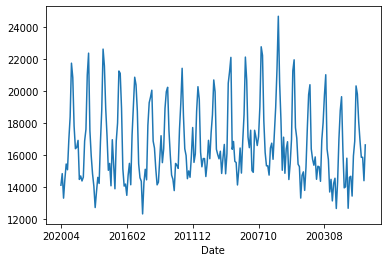

In [119]:
df.plot(x = "Date", y = "CA Net Generation GWh", legend = None)
df.columns.name = 'Type'
df.index.name = 'Index'